In [16]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import io
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
from IPython.display import Image 
from scipy import misc
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [20]:
data = pd.read_excel('/Users/Siddarth/Documents/cclinets.xls')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
5,6,50000,1,1,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
6,7,500000,1,1,2,29,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
7,8,100000,2,2,2,23,0,-1,-1,0,...,221,-159,567,380,601,0,581,1687,1542,0
8,9,140000,2,3,1,28,0,0,2,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0


In [4]:
train, test = train_test_split(data,test_size = 0.20)

## Decision Tree Classifier

In [5]:
c= DecisionTreeClassifier(min_samples_split=100)

In [6]:
features = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE","PAY_0","PAY_2","PAY_3","PAY_4","BILL_AMT4","BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4","PAY_AMT5","PAY_AMT6"]

In [7]:
target = ["default payment next month"]

In [8]:
x_train = train[features]
y_train = train[target]
x_test = test[features]
y_test = test[target]

In [10]:
dt = c.fit(x_train,y_train)
f= dt.feature_importances_
f

array([ 0.03614638,  0.00208267,  0.01205906,  0.00595168,  0.03593704,
        0.42755754,  0.08999574,  0.01543337,  0.02138129,  0.04400378,
        0.03364106,  0.03448243,  0.04586669,  0.05508314,  0.03585405,
        0.03513507,  0.03397812,  0.0354109 ])

In [11]:
predictions= c.predict(x_test)

In [12]:
predictions= pd.DataFrame(predictions)

In [48]:
accu = accuracy_score(y_test,predictions)

In [49]:
print ("accuracy ", accu*100 ,"%")

accuracy  79.6833333333 %


#  RANDOM FOREST
    

In [35]:
rf = RandomForestClassifier()

In [37]:
rf.fit(x_train,y_train)

/Users/Siddarth/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
pred1 = rf.predict(x_test)

In [41]:
accu1= accuracy_score(y_test,pred1)
print("accuracy of Random Forest is",accu2*100,"%")

accuracy of Random Forest is 80.0333333333 %


# ADABOOST

In [25]:
adaboost= AdaBoostClassifier(
base_estimator = DecisionTreeClassifier(max_depth=1),
algorithm = 'SAMME',
n_estimators = 1000,
random_state=104)

In [26]:
adaboost.fit(x_train,y_train)

/Users/Siddarth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=104)

In [27]:
pred = adaboost.predict(x_test)

In [43]:
accu2= accuracy_score(y_test,pred)
accu2

0.8158333333333333

In [44]:
print("accuracy of Adaboost",accu2*100,"%")

accuracy of Adaboost 81.5833333333 %


# Gradient Boosting ##



In [30]:
gbm = GradientBoostingClassifier(max_depth=1,
                                n_estimators=1000,
                                warm_start= True,
                                random_state=104,)

In [31]:
gbm.fit(x_train,y_train)

/Users/Siddarth/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=104, subsample=1.0, verbose=0,
              warm_start=True)

In [32]:
pred = gbm.predict(x_test)

In [45]:
accu3= accuracy_score(y_test,pred)

In [46]:
print("The accuracy of Gradient Boosted Machine is ",accu3*100,"%")

The accuracy of Gradient Boosted Machine is  81.5833333333 %


# MODEL COMPARISON

In [ ]:
print("The accuracy of Decision Tree Classifier is ",accu*100,"%")
print("The accuracy of Random Forest is ",accu1*100,"%")
print("The accuracy of ADaboost is " ,accu2*100,"%")
print("The accuracy of Gradient Boosting is " ,accu3*100,"%")


In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [92]:
rf = accu1*100
dtree=accu*100
adabt=accu2*100
gbm=accu3*100
perf = np.array([dtree,rf,adabt,gbm])
model = np.array(["Decision Tree","Random Forest","AdaBoost","Gradient Boosting"])
perf= pd.DataFrame({"Model":model,"Accuracy":perf})
perf

,Accuracy,Model
0,79.683333,Decision Tree
1,80.033333,Random Forest
2,81.583333,AdaBoost
3,81.583333,Gradient Boosting


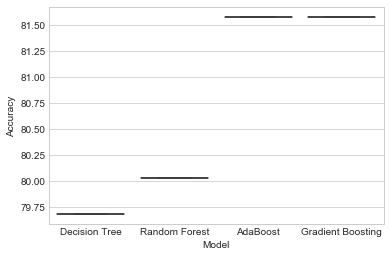

In [107]:
sns.set_style("whitegrid")
g=sns.boxplot(x='Model',
            y='Accuracy',
            data=perf)
plt.show(g)

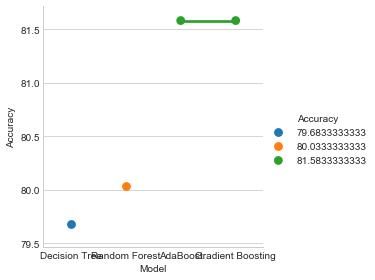

In [112]:
h=sns.factorplot(x='Model',
            y='Accuracy',
                 hue='Accuracy',
            data=perf)
plt.show(h)

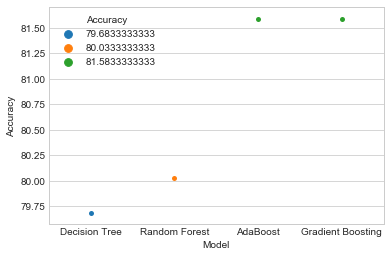

In [117]:
i=sns.stripplot(x='Model',
            y='Accuracy',
                hue="Accuracy",
            data=perf)
plt.show(i)